In [638]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [639]:
df_train = pd.read_csv('train.csv')
df_train.set_index(df_train['Id'],inplace = True)
# df_1_y = pd.DataFrame(df_train['SalePrice'])
# df_1_y.set_index(df_train['Id'],inplace = True)
# df_train.drop(['SalePrice'],axis=1,inplace=True)
df_test = pd.read_csv('test.csv')
df_test.set_index(df_test['Id'],inplace = True)

In [640]:
df_1 = pd.concat([df_train,df_test])

C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [641]:
df_1
# df_train.columns
# df_1.columns
# df_1_y

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
4,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
5,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
6,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,GLQ,Unf,1.0,0.0,Gd,64.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,MnPrv,NaN,0,Wood,1,Typ,480.0,2.0,TA,Unf,TA,Attchd,1993.0,1362,1,GasA,Ex,1.5Fin,6,1,TA,Lvl,Gtl,14115,Inside,85.0,IR1,0,50,RL,0.0,None,Shed,700,10,Mitchel,30,5,5,Y,0,NaN,CompShg,Gable,Normal,143000.0,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
7,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,GLQ,Unf,1.0,0.0,Ex,317.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,636.0,2.0,TA,RFn,TA,Attchd,2004.0,1694,0,GasA,Ex,1Story,7,1,Gd,Lvl,Gtl,10084,Inside,75.0,Reg,0,20,RL,186.0,Stone,NaN,0,8,Somerst,57,5,8,Y,0,NaN,CompShg,Gable,Normal,307000.0,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
8,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,ALQ,BLQ,1.0,0.0,Gd,216.0,Y,PosN,Norm,SBrkr,228,TA,TA,HdBoard,HdBoard,NaN,TA,2,CBlock,2,Typ,484.0,2.0,TA,RFn,TA,Attchd,1973.0,2090,1,GasA,Ex,2Story,8,1,TA,Lvl,Gtl,10382,Corner,NaN,IR1,0,60,RL,240.0,Stone,Shed,350,11,NWAmes,204,6,7,Y,0,NaN,CompShg,Gable,Normal,200000.0,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
9,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,952.0,Y,Artery,Norm,FuseF,205,TA,TA,BrkFace,Wd Shng,NaN,TA,2,BrkTil,2,Min1,468.0,2.0,TA,Unf,Fa,Detchd,1931.0,1774,0,GasA,Gd,1.5Fin,9,2,TA,Lvl,Gtl,6120,Inside,51.0,Reg,0,50,RM,0.0,None,NaN,0,4,OldTown,0,5,7,Y,0,NaN,CompShg,Gable,Abnorml

In [642]:
df_1.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2760.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2896.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,0.597122,1.568003,472.874572,1.766621,1978.113406,1500.759849,0.380267,1460.000000,1.044536,10168.114080,69.305795,4.694416,57.137718,102.201312,50.825968,6.213087,47.486811,5.564577,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,0.646129,0.552969,215.394815,0.761624,25.574285,506.051045,0.502872,842.787043,0.214462,7886.996359,23.344905,46.396825,42.517628,179.334253,567.402211,2.714762,67.575493,1.113131,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,334.000000,0.000000,1.000000,0.000000,1300.000000,21.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,0.000000,1.000000,320.000000,1.000000,1960.000000,1126.000000,0.000000,730.500000,1.000000,7478.000000,59.000000,0.000000,20.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,1.000000,2.000000,480.000000,2.000000,1979.000000,1444.000000,0.000000,1460.000000,1.000000,9453.000000,68.000000,0.000000,50.000000,0.000000,0.000000,6.000000,26.000000,5.000000,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,1.000000,2.000000,576.000000,2.000000,2002.000000,1743.500000,1.000000,2189.500000,1.000000,11570.000000,80.000000,0.000000,70.000000,164.000000,0.000000,8.000000,70.000000,6.000000,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,4.000000,4.000000,1488.000000,5.000000,2207.000000,5642.000000,2.000000,2919.000000,3.000000,215245.000000,313.000000,1064.000000,190.000000,1600.000000,17000.000000,12.000000,742.000000,9.000000,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [643]:
# (df_1.isna().sum()/len(df_1))*100
(df_1.isna().sum())

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2721
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
Functional          2
GarageArea          1
GarageCars          1
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
GarageYrBlt       159
GrLivArea           0
HalfBath            0
Heating             0
HeatingQC           0
HouseStyle          0
Id                  0
KitchenAbvGr        0
KitchenQua

In [644]:
df_1 = df_1.drop(df_1.loc[:,list((100*(df_1.isnull().sum()/len(df_1.index))>30))].columns,1)

In [645]:
df_1.loc[:,list((100*(df_1.isnull().sum()/len(df_1.index))>0))].columns

Index(['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'SaleType', 'TotalBsmtSF', 'Utilities'],
      dtype='object')

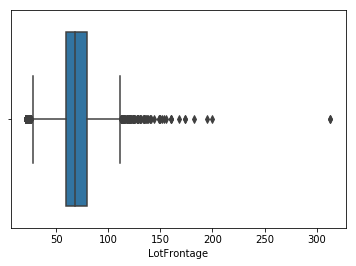

In [646]:
sns.boxplot(df_1['LotFrontage'])

In [647]:
df_1.drop(df_1[(df_1.LotFrontage > 200) ].index , inplace=True)

In [648]:
df_1.LotFrontage[df_1.LotFrontage > 200].count

<bound method Series.count of Series([], Name: LotFrontage, dtype: float64)>

In [649]:
# sns.scatterplot(x=df_train.LotFrontage,y=df_train.SalePrice)

In [650]:
df_1['LotFrontage'].isna().sum()

486

In [651]:
a = df_1['LotFrontage'].values

In [652]:
len(df_1['LotFrontage'])

2917

In [653]:
m = np.isnan(a)

In [654]:
a[m] = np.random.normal(df_1['LotFrontage'].mean(),df_1['LotFrontage'].std(),df_1['LotFrontage'].isna().sum())

In [655]:
df_1['LotFrontage'].isna().sum()

0

In [656]:
# sns.scatterplot(x=df_train.MasVnrArea,y=df_train.SalePrice)

In [657]:
df_1['MasVnrArea'].isnull().sum()

23

In [658]:
df_1['MasVnrArea'].fillna(0,inplace = True)

In [659]:
df_1['BsmtQual'].value_counts()

TA    1283
Gd    1208
Ex     257
Fa      88
Name: BsmtQual, dtype: int64

In [660]:
df_1['BsmtQual'].isna().sum()

81

In [661]:
df_1['BsmtQual'].fillna('TA',inplace = True)

In [662]:
df_1.loc[:,list((100*(df_1.isnull().sum()/len(df_1.index))>0))].columns

Index(['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'KitchenQual', 'MSZoning', 'MasVnrType', 'SaleType',
       'TotalBsmtSF', 'Utilities'],
      dtype='object')

In [663]:
df_1['BsmtCond'].value_counts()
df_1['BsmtCond'].isna().sum()
df_1['BsmtCond'].fillna('TA',inplace = True)

In [664]:
df_1['BsmtExposure'].value_counts()
df_1['BsmtExposure'].isna().sum()
df_1['BsmtExposure'].fillna('No',inplace = True)

In [665]:
df_1['BsmtFinType1'].value_counts()
df_1['BsmtFinType1'].isna().sum()
df_1['BsmtFinType1'].fillna('Unf',inplace = True)

In [666]:
df_1['BsmtFinType2'].isna().sum()
df_1['BsmtFinType2'].value_counts()
df_1['BsmtFinType2'].fillna('Unf',inplace = True)

In [667]:
df_1['Electrical'].value_counts()
df_1['Electrical'].fillna('SBrkr',inplace = True)

In [668]:
# print(df_1['MasVnrType'].value_counts())
# print(df_1['GarageType'].value_counts())
# print(df_1['GarageYrBlt'].value_counts())
# print(df_1['GarageFinish'].value_counts())
# print(df_1['GarageQual'].value_counts())
# print(df_1['GarageCond'].value_counts())
df_1['MasVnrType'].fillna('None',inplace = True)
df_1['GarageType'].fillna('Attchd',inplace = True)
df_1['GarageFinish'].fillna('Unf',inplace = True)
df_1['GarageQual'].fillna('TA',inplace = True)
df_1['GarageCond'].fillna('TA',inplace = True)



In [669]:
#Drop PoolArea,LowQualFinSF, -- BsmthHalfBath, --KitchenAbvGr, 3ssnporch, --Miscval, Garagecars, screenporch,MoSold
#outliear Lot Area, MasVnrArea,TotalBsmtSF,1stFlrSF,2nfFlrSF, GRLivArea, Wooddecksf,OpenPorchSF,EnclosedPorch
#calculate totalBsmtSF-BsmtUnfSF
#drop BsmtUnfSF,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,
#drop bsmthalfbath as value is more for 0

In [670]:
#Drop Street,Utilities,Roofmatl,Heating,Bsmtfintyp2,CentralAir,Functional,GarageYrBly
#Drop PoolArea,LowQualFinSF, -- BsmthHalfBath, --KitchenAbvGr, 3ssnporch, --Miscval, Garagecars, screenporch,MoSold
#outliear Miscval, Lot Area, MasVnrArea, GRLivArea, Wooddecksf
#calculate totalBsmtSF-BsmtUnfSF
#drop BsmtUnfSF,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,
#drop bsmthalfbath as value is more for 0

In [671]:
df_1 = df_1.drop(['Street','Utilities','RoofMatl','Heating','BsmtFinType2','CentralAir','Functional','GarageYrBlt'],axis=1)

In [672]:
df_1 = df_1.drop(['PoolArea','LowQualFinSF','3SsnPorch','GarageCars','ScreenPorch','MoSold','BsmtFinType1','BsmtFinSF1','BsmtFinSF2','BsmtHalfBath','BsmtFullBath'],axis=1)

In [673]:
df_1 = df_1.drop(['MiscVal','KitchenAbvGr','Condition2','PavedDrive','LandSlope'],axis=1)

In [674]:
df_1.drop(df_1.TotalBsmtSF[(df_1.TotalBsmtSF > 2800)].index,inplace = True)

In [675]:
df_1['BsmtUnfSF'].fillna('559',inplace = True)
df_1['Electrical'].fillna('SBrkr',inplace = True)
df_1['Exterior1st'].fillna('VinylSd',inplace = True)
df_1['Exterior2nd'].fillna('VinylSd',inplace = True)
df_1['GarageArea'].fillna('471',inplace = True)
df_1['KitchenQual'].fillna('TA',inplace = True)
df_1['MSZoning'].fillna('TA',inplace = True)
df_1['SaleType'].fillna('WD',inplace = True)
df_1['TotalBsmtSF'].fillna('1045',inplace = True)


In [676]:
#outliear Lot Area, MasVnrArea, GRLivArea, Wooddecksf
#'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd', 'GarageArea','KitchenQual', 'MSZoning', 'SaleType', 'TotalBsmtSF'
# sns.boxplot(df_1['TotalBsmtSF'])#,'MasVnrArea','GrLivArea','WoodDeckSF'])

In [677]:
# df_1.drop(df_1.LotArea[(df_1.LotArea > df_1.LotArea.quantile(0.98))].index,inplace = True)
# df_1.drop(df_1.MasVnrArea[(df_1.MasVnrArea > df_1.MasVnrArea.quantile(0.97))].index,inplace = True)
# df_1.drop(df_1.GrLivArea[(df_1.GrLivArea > df_1.GrLivArea.quantile(0.98))].index,inplace = True)
# df_1.drop(df_1.WoodDeckSF[(df_1.WoodDeckSF > df_1.WoodDeckSF.quantile(0.98))].index,inplace = True)
# df_1.drop(df_1.TotalBsmtSF[(df_1.TotalBsmtSF > df_1.TotalBsmtSF.quantile(0.98))].index,inplace = True)


In [678]:
cont =[]
cat = []
for i in df_1.columns:
    if df_1[i].dtypes == 'int64' or df_1[i].dtypes == 'float64':
        cont.append(i)
    else:
        cat.append(i)

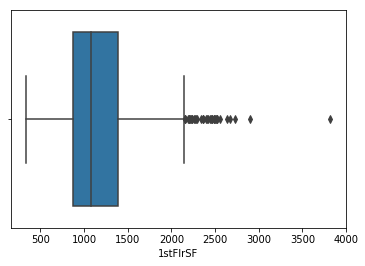

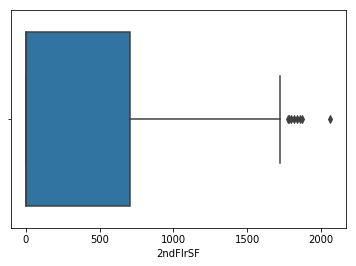

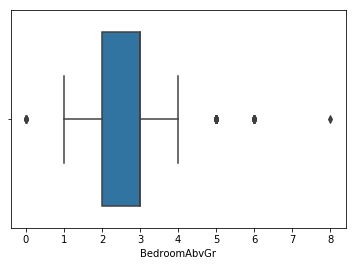

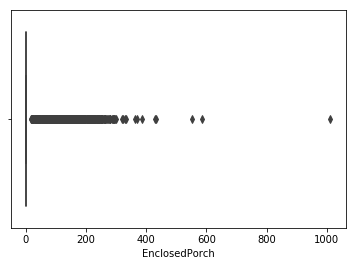

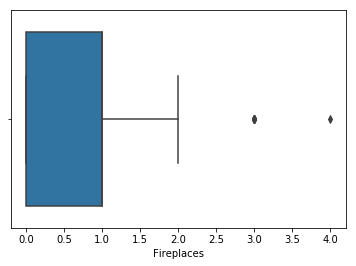

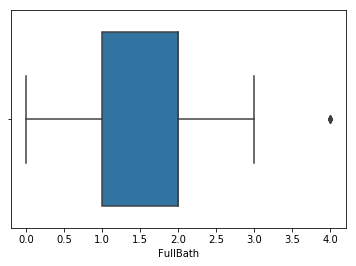

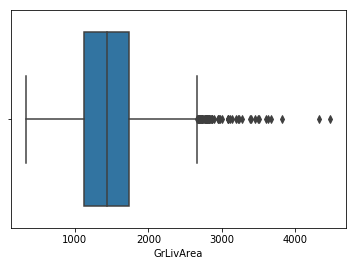

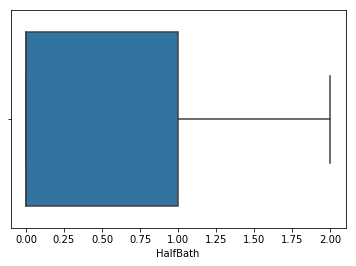

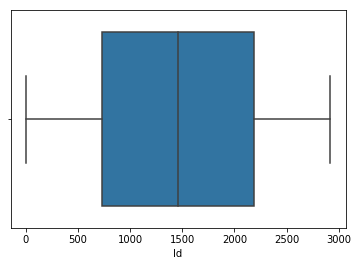

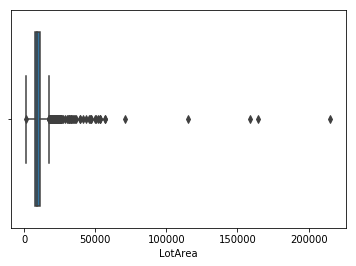

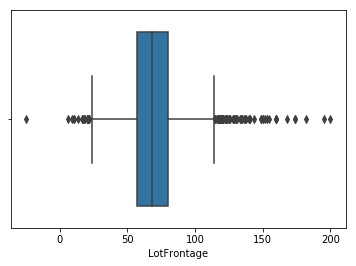

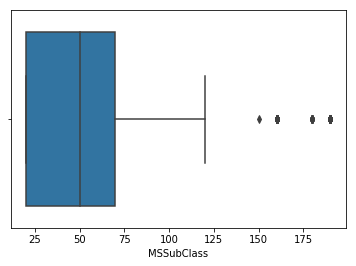

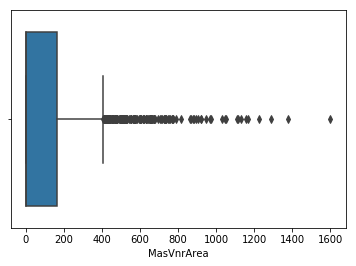

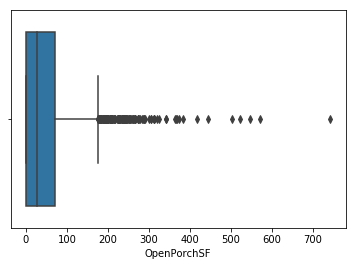

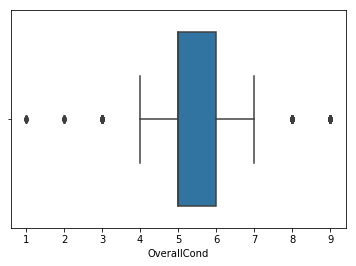

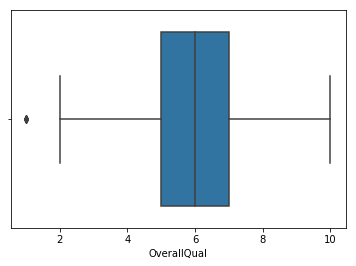

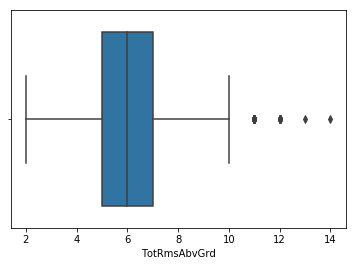

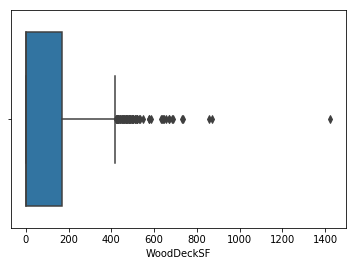

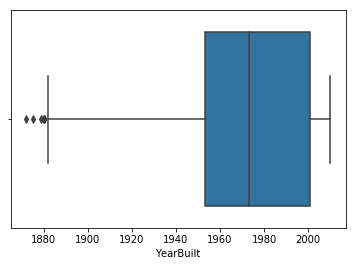

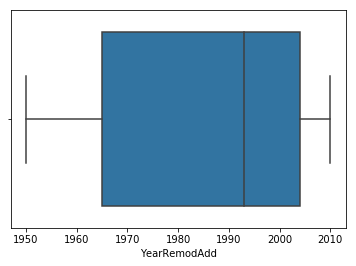

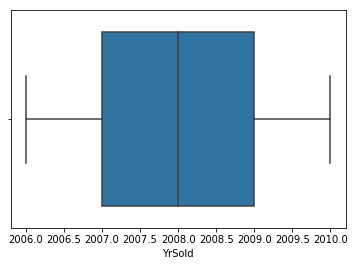

In [679]:
for i in cont:
    sns.boxplot(df_1[i])
    plt.show()

In [680]:
# for i in cont:
#     sns.scatterplot(x=df_1[i],y = df_1.SalePrice)
#     plt.show()

In [681]:
#OverallQual, OverallCond
for i in df_1['OverallQual']:
    if i in [1,2,3,4]:
        df_1['OverallQual'] = df_1['OverallQual'].replace(i,'Bad')
    elif i in [5,6,7]:
        df_1['OverallQual'] = df_1['OverallQual'].replace(i,'Average')
    else:
        df_1['OverallQual'] = df_1['OverallQual'].replace(i,'Good')

In [682]:
for i in df_1['OverallCond']:
    if i in [1,2,3,4]:
        df_1['OverallCond'] = df_1['OverallCond'].replace(i,'Bad')
    elif i in [5,6,7]:
        df_1['OverallCond'] = df_1['OverallCond'].replace(i,'Average')
    else:
        df_1['OverallCond'] = df_1['OverallCond'].replace(i,'Good')

In [683]:
for i in df_1['FullBath']:
    if i in [0]:
        df_1['FullBath'] = df_1['FullBath'].replace(i,1)
    elif i in [5,6]:
        df_1['FullBath'] = df_1['FullBath'].replace(i,4)

In [684]:
for i in df_1['TotRmsAbvGrd']:
    if i in [0,1,2,4]:
        df_1['TotRmsAbvGrd'] = df_1['TotRmsAbvGrd'].replace(i,'within_4')
    elif i in [5,6,7]:
        df_1['TotRmsAbvGrd'] = df_1['TotRmsAbvGrd'].replace(i,'5_6_7')
    elif i in [8,9,10]:
        df_1['TotRmsAbvGrd'] = df_1['TotRmsAbvGrd'].replace(i,'8_to_10')
    else:
        df_1['TotRmsAbvGrd'] = df_1['TotRmsAbvGrd'].replace(i,'More_than_10')

In [685]:
# df_1['Fireplaces'] = df_1['Fireplaces'].map(lambda x : 2 if x == 3)
for i in df_1['Fireplaces']:
    if i in [3]:
        df_1['TotRmsAbvGrd'] = df_1['TotRmsAbvGrd'].replace(i,2)

In [686]:
df_1['MSSubClass'].value_counts()
#40 ->30
#180 -> 80
for i in df_1['MSSubClass']:
    if i in [40]:
        df_1['MSSubClass'] = df_1['MSSubClass'].replace(i,30)
    elif i in [180]:
        df_1['MSSubClass'] = df_1['MSSubClass'].replace(i,80)

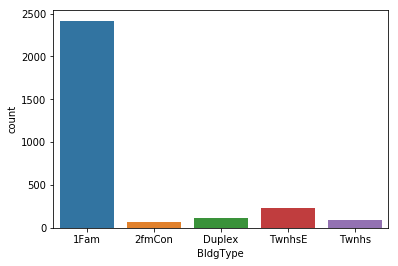

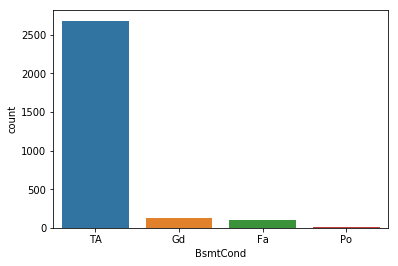

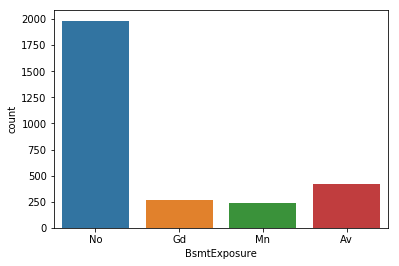

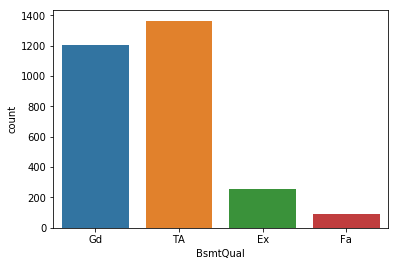

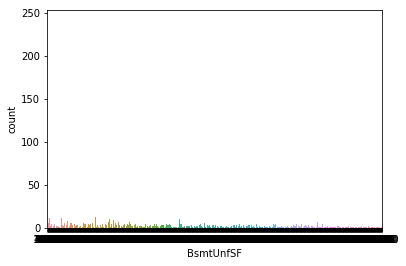

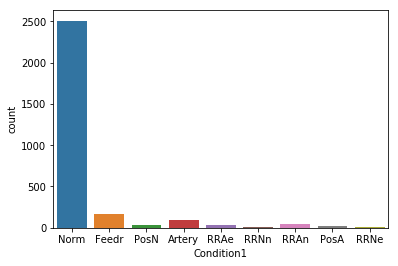

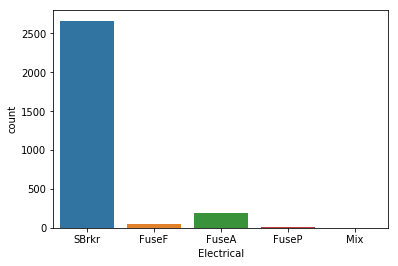

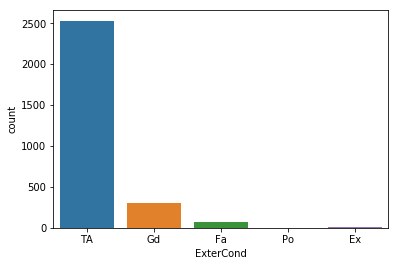

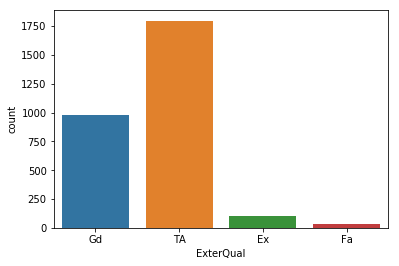

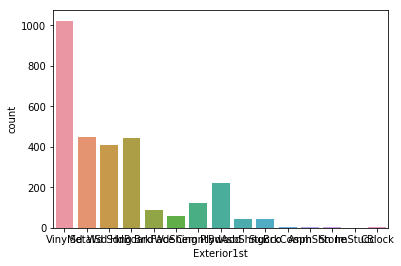

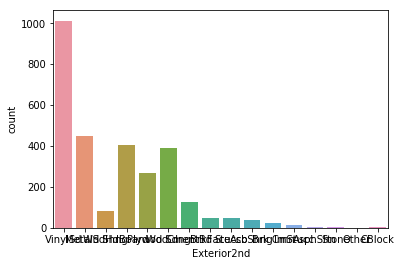

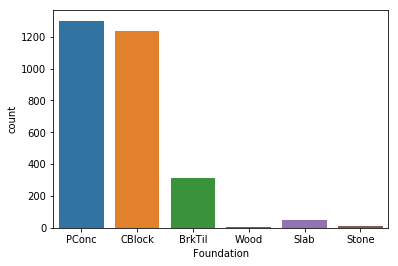

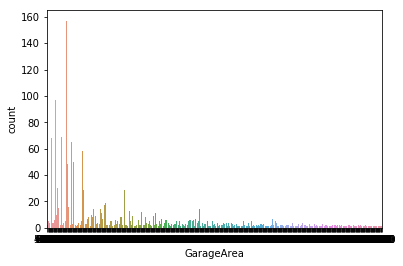

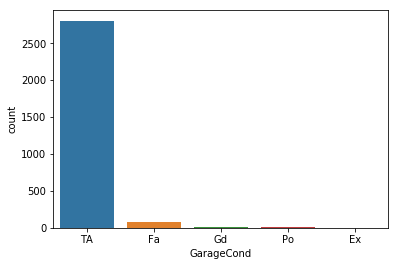

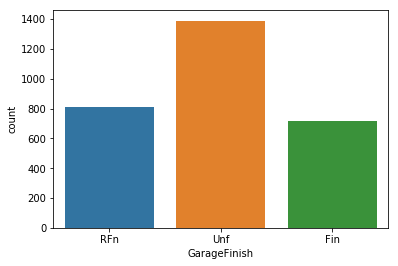

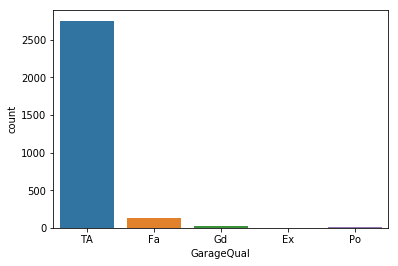

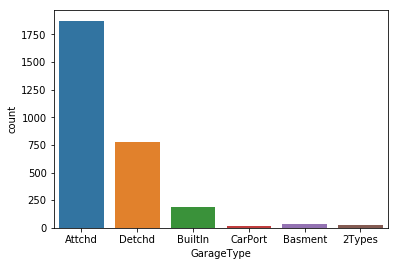

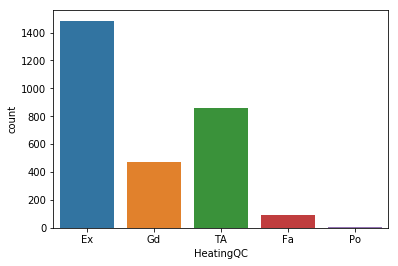

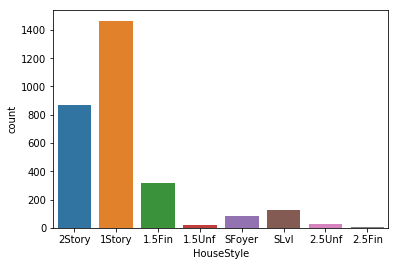

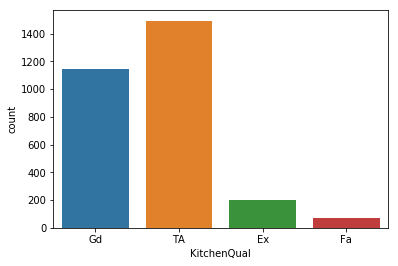

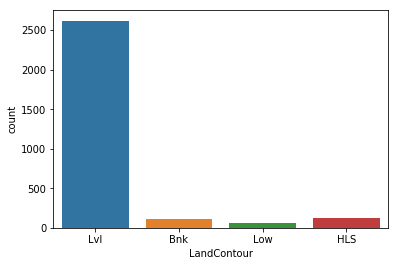

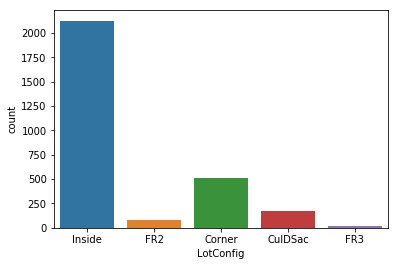

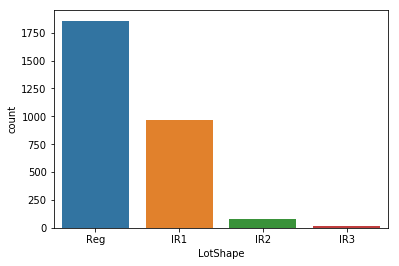

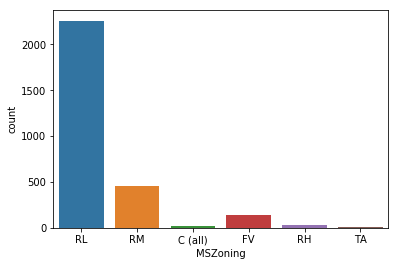

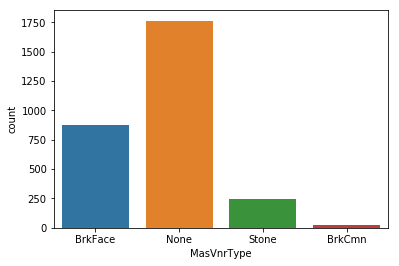

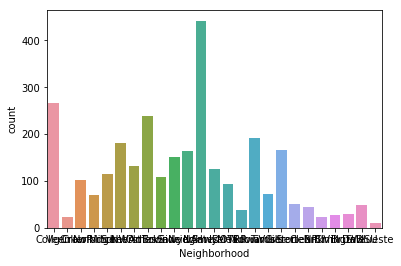

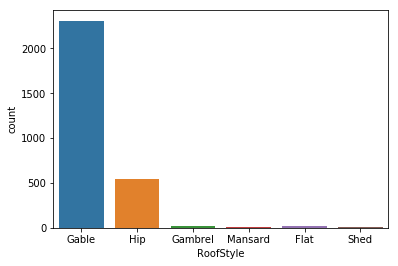

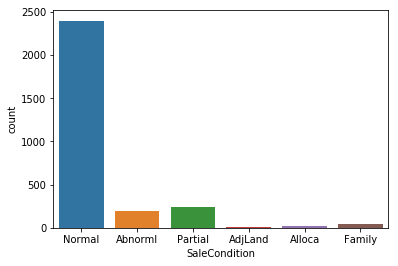

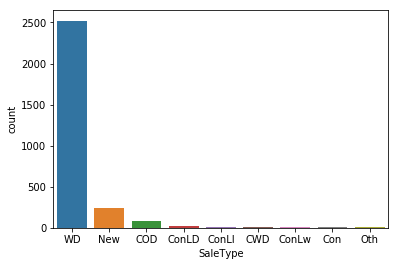

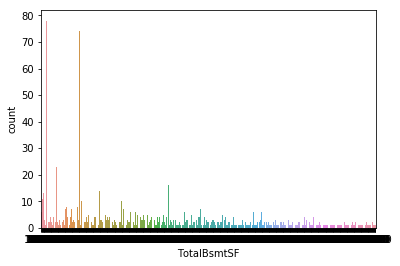

In [687]:
for i in cat:
#     sns.barplot(x=df_1[i],y = df_1.SalePrice)
#     plt.show()
    sns.countplot(x=df_1[i])
    plt.show()
#     print(df_1[i].value_counts())

In [688]:
for i in df_1['Electrical']:
    if i not in ['SBrkr']:
        df_1['Electrical'] = df_1['Electrical'].replace(i,'Others')

In [689]:
for i in df_1['Foundation']:
    if i not in ['PConc','CBlock','BrkTil']:
        df_1['Foundation'] = df_1['Foundation'].replace(i,'Others')

In [690]:
for i in df_1['LotShape']:
    if i in ['IR2','IR3']:
        df_1['LotShape'] = df_1['LotShape'].replace(i,'IR1')

In [691]:
for i in df_1['LotConfig']:
    if i in ['FR2','FR3']:
        df_1['LotConfig'] = df_1['LotConfig'].replace(i,'FR')

In [692]:
for i in df_1['Condition1']:
    if i in ['Feedr','Artery']:
        df_1['Condition1'] = df_1['Condition1'].replace(i,'Adj_Street')
    elif i in ['PosN','PosA']:
        df_1['Condition1'] = df_1['Condition1'].replace(i,'PosF')
    elif i in ['RRAn','RRAe','RRNn','RRNe']:
        df_1['Condition1'] = df_1['Condition1'].replace(i,'Near_Rail')

In [693]:
for i in df_1['HouseStyle']:
    if i in ['1.5Fin','1.5Unf']:
        df_1['HouseStyle'] = df_1['HouseStyle'].replace(i,'1.5Story')
    elif i in ['2.5Fin','2.5Unf']:
        df_1['HouseStyle'] = df_1['HouseStyle'].replace(i,'2.5Story')
    elif i in ['SFoyer','SLvl']:
        df_1['HouseStyle'] = df_1['HouseStyle'].replace(i,'Split')

In [694]:
for i in df_1['RoofStyle']:
    if i not in ['Gable']:
        df_1['RoofStyle'] = df_1['RoofStyle'].replace(i,'Others')

In [695]:
#dropping ext1 & ext2
df_1 = df_1.drop(['Exterior1st','Exterior2nd','Neighborhood','GarageCond'],axis=1)

In [696]:
for i in df_1['MasVnrType']:
    if i not in ['BrkFace','BrkCmn']:
        df_1['MasVnrType'] = df_1['MasVnrType'].replace(i,'Brk')

In [697]:
#ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual
col_name = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual']
for j in col_name:
    for i in df_1[j]:
        if i in ['Ex','Gd']:
            df_1[j] = df_1[j].replace(i,'Good')
        if i in ['TA','Fa']:
            df_1[j] = df_1[j].replace(i,'Average')
        if i in ['Po']:
            df_1[j] = df_1[j].replace(i,'Average')

df_1.ExterQual.value_counts()


Average    1832
Good       1079
Name: ExterQual, dtype: int64

In [698]:
for i in df_1['GarageQual']:
    if i in ['Ex','Gd']:
        df_1['GarageQual'] = df_1['GarageQual'].replace(i,'Good')

In [699]:
for i in df_1['SaleCondition']:
    if i not in ['Normal','Partial','Abnormal']:
        df_1['SaleCondition'] = df_1['SaleCondition'].replace(i,'Others')

In [700]:
for i in df_1['SaleType']:
    if i not in ['WD','New','COD']:
        df_1['SaleType'] = df_1['SaleType'].replace(i,'Others')

In [701]:
df_1.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BldgType', 'BsmtCond',
       'BsmtExposure', 'BsmtQual', 'BsmtUnfSF', 'Condition1', 'Electrical',
       'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fireplaces', 'Foundation',
       'FullBath', 'GarageArea', 'GarageFinish', 'GarageQual', 'GarageType',
       'GrLivArea', 'HalfBath', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenQual',
       'LandContour', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape',
       'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'RoofStyle', 'SaleCondition', 'SaleType',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

In [702]:
col1_name = ['MSSubClass', 'MSZoning', 'LotShape',
       'LandContour', 'LotConfig', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond','RoofStyle',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 
       'HeatingQC', 'Electrical', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageQual',
       'SaleType',
       'SaleCondition']

In [703]:
# df_1_y = pd.DataFrame(df_train['SalePrice'])
# df_1_y.set_index(df_train['Id'])

In [704]:
# df_1_y.head()
# df_1.head()
# # df_1_y.set_index(df_1['Id'],inplace=True)
# df_1.set_index(df_1['Id'],drop=True,inplace=True)

In [705]:
df_1.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtQual,BsmtUnfSF,Condition1,Electrical,EnclosedPorch,ExterCond,ExterQual,Fireplaces,Foundation,FullBath,GarageArea,GarageFinish,GarageQual,GarageType,GrLivArea,HalfBath,HeatingQC,HouseStyle,Id,KitchenQual,LandContour,LotArea,LotConfig,LotFrontage,LotShape,MSSubClass,MSZoning,MasVnrArea,MasVnrType,OpenPorchSF,OverallCond,OverallQual,RoofStyle,SaleCondition,SaleType,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,856,854,3,1Fam,Average,No,Good,150,Norm,SBrkr,0,Average,Good,0,PConc,2,548,RFn,Average,Attchd,1710,1,Good,2Story,1,Good,Lvl,8450,Inside,65.0,Reg,60,RL,196.0,BrkFace,61,Average,Average,Gable,Normal,WD,8_to_10,856,0,2003,2003,2008
2,1262,0,3,1Fam,Average,Gd,Good,284,Adj_Street,SBrkr,0,Average,Average,1,CBlock,2,460,RFn,Average,Attchd,1262,0,Good,1Story,2,Average,Lvl,9600,FR,80.0,Reg,20,RL,0.0,Brk,0,Good,Average,Gable,Normal,WD,5_6_7,1262,298,1976,1976,2007
3,920,866,3,1Fam,Average,Mn,Good,434,Norm,SBrkr,0,Average,Good,1,PConc,2,608,RFn,Average,Attchd,1786,1,Good,2Story,3,Good,Lvl,11250,Inside,68.0,IR1,60,RL,162.0,BrkFace,42,Average,Average,Gable,Normal,WD,5_6_7,920,0,2001,2002,2008
4,961,756,3,1Fam,Good,No,Average,540,Norm,SBrkr,272,Average,Average,1,BrkTil,1,642,Unf,Average,Detchd,1717,0,Good,2Story,4,Good,Lvl,9550,Corner,60.0,IR1,70,RL,0.0,Brk,35,Average,Average,Gable,Others,WD,5_6_7,756,0,1915,1970,2006
5,1145,1053,4,1Fam,Average,Av,Good,490,Norm,SBrkr,0,Average,Good,1,PConc,2,836,RFn,Average,Attchd,2198,1,Good,2Story,5,Good,Lvl,14260,FR,84.0,IR1,60,RL,350.0,BrkFace,84,Average,Good,Gable,Normal,WD,8_to_10,1145,192,2000,2000,2008


In [706]:
# df_dum = pd.get_dummies(df['Lead Origin'],prefix='Lead Origin',drop_first=True)
# df = pd.concat([df,df_dum],axis=1)

for i in col1_name:
    print(df_1[i].value_counts())

20     1073
60      573
50      287
120     182
30      145
80      135
160     128
70      128
90      109
190      61
85       48
75       23
45       18
150       1
Name: MSSubClass, dtype: int64
RL         2257
RM          460
FV          139
RH           26
C (all)      25
TA            4
Name: MSZoning, dtype: int64
Reg    1857
IR1    1054
Name: LotShape, dtype: int64
Lvl    2619
HLS     118
Bnk     114
Low      60
Name: LandContour, dtype: int64
Inside     2126
Corner      510
CulDSac     176
FR           99
Name: LotConfig, dtype: int64
Norm          2506
Adj_Street     255
Near_Rail       93
PosF            57
Name: Condition1, dtype: int64
1Fam      2417
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64
1Story      1465
2Story       870
1.5Story     333
Split        211
2.5Story      32
Name: HouseStyle, dtype: int64
Average    2155
Good        473
Bad         283
Name: OverallQual, dtype: int64
Average    2558
Good        185
Bad       

In [707]:
for i in col1_name:
    df_1_dum = pd.get_dummies(df_1[i],prefix=i,drop_first=True)
    df_1 = pd.concat([df_1,df_1_dum],axis=1)

In [708]:
df_1.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BldgType', 'BsmtCond',
       'BsmtExposure', 'BsmtQual', 'BsmtUnfSF', 'Condition1', 'Electrical',
       ...
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'GarageQual_Good', 'SaleType_New',
       'SaleType_Others', 'SaleType_WD', 'SaleCondition_Others',
       'SaleCondition_Partial'],
      dtype='object', length=135)

In [709]:
df_1.describe()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,EnclosedPorch,Fireplaces,FullBath,GrLivArea,HalfBath,Id,LotArea,LotFrontage,MSSubClass,MasVnrArea,OpenPorchSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_TA,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,Condition1_Near_Rail,Condition1_Norm,Condition1_PosF,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,...,OverallCond_Bad,OverallCond_Good,RoofStyle_Others,MasVnrType_BrkCmn,MasVnrType_BrkFace,ExterQual_Good,ExterCond_Good,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Good,BsmtCond_Good,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,HeatingQC_Good,Electrical_SBrkr,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Good,TotRmsAbvGrd_8_to_10,TotRmsAbvGrd_More_than_10,TotRmsAbvGrd_within_4,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Good,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Others,SaleCondition_Partial
count,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,...,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000
mean,1154.197870,336.553762,2.859842,23.061834,0.594297,1.570251,1495.458949,0.379938,1461.243902,10119.108897,68.879528,56.607695,100.172449,47.109241,93.468568,1971.237719,1984.207145,2007.791824,0.049811,0.006183,0.098592,0.196840,0.043971,0.007901,0.046376,0.016489,0.037444,0.062521,0.000344,0.043971,0.020955,0.047750,0.008932,0.775335,0.158021,0.001374,0.637925,0.040536,0.020611,0.899691,0.060460,0.034009,0.730333,0.031948,0.860873,0.019581,0.021299,0.037444,0.032978,0.077980,...,0.057712,0.063552,0.206802,0.008588,0.301271,0.370663,0.106836,0.423909,0.022329,0.446925,0.501202,0.041910,0.092752,0.082102,0.681553,0.672965,0.915149,0.523531,0.021299,0.001374,0.362762,0.008588,0.035383,0.254208,0.546891,0.136723,0.016489,0.007214,0.000344,0.463071,0.194435,0.025077,0.067674,0.434215,0.074201,0.003435,0.000344,0.643422,0.012367,0.063552,0.005153,0.267606,0.277568,0.477156,0.009275,0.081072,0.023016,0.866025,0.093439,0.083133
std,374.453242,428.288797,0.822956,64.130502,0.643729,0.544066,490.972763,0.502840,842.802500,7788.439802,22.211219,41.537570,175.965585,66.656114,126.288054,30.288314,20.892772,1.315497,0.217592,0.078405,0.298164,0.397678,0.205066,0.088551,0.210334,0.127369,0.189880,0.242142,0.018534,0.205066,0.143258,0.213273,0.094101,0.417433,0.364824,0.037050,0.480683,0.197246,0.142104,0.300463,0.23

In [710]:
# LotFrontage,LotArea,Years_old,Since_last_modified,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Since_YrSold

In [711]:
df_1['Years_old'] = 2019 - df_1['YearBuilt']
df_1['Since_last_modified'] = 2019 - df_1['YearRemodAdd']
df_1['Since_YrSold']= 2019 - df_1['YrSold']

In [712]:
df_1 = df_1.drop(['MSSubClass', 'MSZoning', 'LotShape',
       'LandContour', 'LotConfig', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond','RoofStyle',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 
       'HeatingQC', 'Electrical', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageQual',
       'SaleType',
       'SaleCondition','YearBuilt','YearRemodAdd','YrSold'],axis =1)

In [713]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [717]:
# LotFrontage,LotArea,Years_old,Since_last_modified,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Since_YrSold
# pd.merge(df_1,df_train['SalePrice'],left_index=True, right_index=True)
# df_1 = df_1.drop(['Id'],axis=1)
# df_1_y = pd.DataFrame(df_1['SalePrice'])
# df_1_y.set_index(df_1['Id'],inplace = True)
# df_1.drop(['SalePrice'],axis=1,inplace=True)
df_1_test

,1stFlrSF,2ndFlrSF,BsmtUnfSF,EnclosedPorch,GarageArea,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,TotalBsmtSF,WoodDeckSF,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_TA,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,Condition1_Near_Rail,Condition1_Norm,Condition1_PosF,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_Split,OverallQual_Bad,OverallQual_Good,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,ExterQual_Good,ExterCond_Good,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Good,BsmtCond_Good,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,HeatingQC_Good,Electrical_SBrkr,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Good,TotRmsAbvGrd_8_to_10,TotRmsAbvGrd_More_than_10,TotRmsAbvGrd_within_4,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Good,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Others,SaleCondition_Partial,Years_old,Since_last_modified,Since_YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,896,0,270,0,730,896,11622,80.000000,0.0,0,882,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,58,58,9
1462,1329,0,406,0,312,1329,14267,81.000000,108.0,36,1329,393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,61,61,9
1463,928,701,137,0,482,1629,13830,74.000000,0.0,34,928,212,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,22,21,9
1464,926,678,324,0,470,1604,9978,78.000000,20.0,36,926,360,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,21,21,9
1465,1280,0,1017,0,506,1280,5005,43.000000,0.0,82,1280,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,27,27,9
1466,763,892,763,0,440,1655,10000,75.000000,0.0,84,763,157,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,26,25,9
1467,1187,0,233,0,420,1187,7980,52.914814,0.0,21,1168,483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,27,12,9
1468,789,676,789,0,393,1465,8402,63.000000,0.0,75,789,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,21,21,9
1469,1341,0,663,0,506,1341,10176,85.000000,0.0,0,1300,192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,29,29,9


In [756]:
df_1_train = df_1.loc[0:1460]
df_1_test = df_1.loc[1461:]
# df_1_y.set_index(df_train['Id'])
df_2 = pd.merge(df_train['SalePrice'],df_1_train,left_index=True, right_index=True)

In [757]:
df_y = df_2['SalePrice']
df_2.drop(['SalePrice'],axis =1,inplace = True)

In [758]:
df_2.shape

(1454, 104)

In [790]:
X_train, X_test, y_train, y_test = train_test_split(df_2,df_y,train_size=0.7,test_size=0.3,random_state=100)

In [791]:
X_train.describe()

,1stFlrSF,2ndFlrSF,EnclosedPorch,GrLivArea,Id,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,WoodDeckSF,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_TA,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,Condition1_Near_Rail,Condition1_Norm,Condition1_PosF,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_Split,OverallQual_Bad,OverallQual_Good,OverallCond_Bad,OverallCond_Good,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,ExterQual_Good,ExterCond_Good,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Good,BsmtCond_Good,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,HeatingQC_Good,Electrical_SBrkr,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Good,TotRmsAbvGrd_8_to_10,TotRmsAbvGrd_More_than_10,TotRmsAbvGrd_within_4,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Good,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Others,SaleCondition_Partial,Years_old,Since_last_modified,Since_YrSold
count,1017.000000,1017.000000,1017.000000,1017.00000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.0,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.0,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,...,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.0,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.0,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.0,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,1165.411013,330.835792,23.239921,1501.06588,735.751229,10543.271386,70.079807,101.872173,44.682399,94.228122,0.050147,0.008850,0.102262,0.200590,0.040315,0.009833,0.055064,0.014749,0.031465,0.058997,0.0,0.038348,0.018682,0.034415,0.009833,0.786627,0.162242,0.0,0.634218,0.037365,0.026549,0.896755,0.062930,0.030482,0.712881,0.034415,0.862340,0.017699,0.019666,0.031465,0.028515,0.073746,0.499508,0.010816,0.292035,0.078663,0.096362,0.161259,0.058014,0.065880,...,0.009833,0.294985,0.360865,0.104228,0.435595,0.021632,0.442478,0.506391,0.045231,0.091445,0.079646,0.667650,0.670600,0.920354,0.518191,0.016716,0.0,0.359882,0.006883,0.032448,0.244838,0.561455,0.142576,0.008850,0.003933,0.0,0.468043,0.214356,0.023599,0.062930,0.460177,0.076696,0.002950,0.0,0.653884,0.014749,0.061947,0.006883,0.258604,0.278269,0.472960,0.012783,0.082596,0.018682,0.871190,0.092429,0.082596,47.957719,33.961652,11.167158
std,377.746684,426.399287,63.130844,502.42239,422.758217,10293.661773,22.978911,183.717863,62.335645,125.664983,0.218357,0.093701,0.303141,0.400639,0.196793,0.098721,0.228217,0.120607,0.174657,0.235735,0.0,0.192130,0.135467,0.182382,0.098721,0.409890,0.368854,0.0,0.481886,0.189747,0.160839,0.304428,0.242957,0.171993,0.452640,0.182382,0.344712,0.131920,0.138917,0.174657,0.166521,0.261486,0.500246,0

In [761]:
# df_1_y

In [792]:
scaler = StandardScaler()
X_train[['LotFrontage','LotArea','Years_old','Since_last_modified','MasVnrArea','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','Since_YrSold']] = scaler.fit_transform(X_train[['LotFrontage','LotArea','Years_old','Since_last_modified','MasVnrArea','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','Since_YrSold']])

C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning

In [793]:
linreg = LinearRegression()
rfe = RFE(linreg, 30)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train, y_train)

In [794]:
col = X_train.columns[rfe.support_]
col

Index(['1stFlrSF', '2ndFlrSF', 'BsmtUnfSF', 'GrLivArea', 'TotalBsmtSF',
       'MSSubClass_45', 'MSSubClass_70', 'MSSubClass_90', 'MSSubClass_160',
       'LotConfig_CulDSac', 'Condition1_Norm', 'Condition1_PosF',
       'BldgType_Duplex', 'OverallQual_Good', 'OverallCond_Bad',
       'OverallCond_Good', 'MasVnrType_BrkCmn', 'ExterQual_Good',
       'BsmtExposure_Gd', 'FullBath_2', 'FullBath_3', 'HalfBath_2',
       'BedroomAbvGr_5', 'Fireplaces_2', 'GarageType_Basment', 'SaleType_New',
       'SaleType_Others', 'SaleType_WD', 'SaleCondition_Partial', 'Years_old'],
      dtype='object')

In [795]:
X_train = X_train[col]

In [796]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
12,BldgType_Duplex,inf
28,SaleCondition_Partial,inf
25,SaleType_New,inf
7,MSSubClass_90,inf
3,GrLivArea,144.48
1,2ndFlrSF,104.67
0,1stFlrSF,82.84
27,SaleType_WD,9.21
10,Condition1_Norm,7.35
19,FullBath_2,4.66


In [797]:
X_train = X_train.drop(['BldgType_Duplex'],axis=1)
X_train = X_train.drop(['MSSubClass_90'],axis=1)
X_train = X_train.drop(['SaleCondition_Partial'],axis=1)
X_train = X_train.drop(['GrLivArea'],axis=1)
X_train = X_train.drop(['2ndFlrSF'],axis=1)
X_train = X_train.drop(['1stFlrSF'],axis=1)
# df_1 = df_1.drop(['GarageType_Attchd'],axis=1)
# df_1 = df_1.drop(['MSZoning_RL'],axis=1)
# df_1 = df_1.drop(['BedroomAbvGr_3'],axis=1)
# df_1 = df_1.drop(['SaleType_New'],axis=1)
# df_1 = df_1.drop(['HouseStyle_1Story'],axis=1)
# df_1 = df_1.drop(['HouseStyle_2Story'],axis=1)
# df_1 = df_1.drop(['MSSubClass_190'],axis=1)
# df_1 = df_1.drop(['SaleType_WD'],axis=1)
# df_1 = df_1.drop(['LandContour_Lvl'],axis=1)
# df_1 = df_1.drop(['BldgType_TwnhsE'],axis=1)
# df_1 = df_1.drop(['Electrical_SBrkr'],axis=1)
# df_1 = df_1.drop(['Condition1_Norm','HouseStyle_Split','2ndFlrSF'],axis=1)
# df_1 = df_1.drop(['Years_old','Foundation_PConc','MSSubClass_75','BsmtExposure_No'],axis=1)
# # df_1 = df_1.drop(['MSSubClass_60','FullBath_2','BsmtQual_Good','GarageFinish_Unf'],axis=1)

In [505]:
# df_1 = df_1.drop(['MSSubClass_45','MSSubClass_80','MSSubClass_85','MSSubClass_120','MSSubClass_160','MSZoning_RH','LandContour_HLS',
#                   'LandContour_Low','LotConfig_CulDSac','LotConfig_FR','Condition1_PosF','BldgType_2fmCon','BldgType_Twnhs',
# 'HouseStyle_2.5Story',
# 'RoofStyle_Others',
# 'MasVnrType_BrkCmn',
# 'Foundation_Others',
# 'BsmtCond_Good',
# 'BsmtExposure_Mn',
# 'HalfBath_2',
# 'BedroomAbvGr_1',
# 'BedroomAbvGr_2',
# 'BedroomAbvGr_5',
# 'BedroomAbvGr_6',
# 'TotRmsAbvGrd_More_than_10',
# 'TotRmsAbvGrd_within_4',
# 'Fireplaces_3',
# 'GarageType_Basment',
# 'GarageType_CarPort',
# 'GarageType_Detchd',
# 'GarageFinish_RFn',
# 'GarageQual_Good'],axis=1)


In [798]:
col = X_train.columns

In [799]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500]}

params1 = {'alpha': [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210 ]}

params2 = {'alpha': [0,0.01,0.1,0.5,1,2,3,4,5,6,7,8,9,10]}


In [800]:
lm = Lasso()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_train,y_train_pred))
print(metrics.mean_squared_error(y_train,y_train_pred))
# y_test_pred = lm.predict(X_test)
# print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8021140268286525
1322577776.6131828


In [786]:
# X_train

In [787]:
# y_train

In [801]:
X_test[['LotFrontage','LotArea','Years_old','Since_last_modified','MasVnrArea','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','Since_YrSold']] = scaler.transform(X_test[['LotFrontage','LotArea','Years_old','Since_last_modified','MasVnrArea','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','Since_YrSold']])

C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [802]:
X_test = X_test[col]

In [803]:
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.6870738666995686


In [512]:
# # lasso model parameters
# model_parameters = list(lm.coef_)
# model_parameters.insert(0, lm.intercept_)
# model_parameters = [x for x in model_parameters]
# cols = X_train.columns
# cols = cols.insert(0, "constant")
# list(zip(cols, model_parameters))

In [810]:
lasso = Lasso()
folds = 5
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params2, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0, 0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [811]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.029598,0.014785,0.001400,4.902330e-04,0,{'alpha': 0},0.770851,0.819072,0.762531,0.737255,0.780541,0.774091,0.026717,14,0.807112,0.793511,0.805919,0.811978,0.804012,0.804506,0.006095
1,0.003799,0.000750,0.001200,4.002590e-04,0.01,{'alpha': 0.01},0.770851,0.819072,0.762532,0.737255,0.780541,0.774091,0.026717,13,0.807112,0.793511,0.805919,0.811978,0.804012,0.804506,0.006095
2,0.003601,0.000490,0.001001,1.081065e-06,0.1,{'alpha': 0.1},0.770850,0.819068,0.762539,0.737256,0.780544,0.774093,0.026714,12,0.807112,0.793511,0.805919,0.811978,0.804012,0.804506,0.006095
3,0.003400,0.000801,0.001402,4.921639e-04,0.5,{'alpha': 0.5},0.770845,0.819053,0.762574,0.737264,0.780557,0.774100,0.026705,11,0.807112,0.793511,0.805919,0.811978,0.804012,0.804506,0.006095
4,0.004603,0.002249,0.001398,7.953188e-04,1,{'alpha': 1},0.770838,0.819035,0.762617,0.737273,0.780573,0.774108,0.026694,10,0.807112,0.793511,0.805919,0.811977,0.804012,0.804506,0.006095
5,0.002600,0.000490,0.001000,4.156970e-07,2,{'alpha': 2},0.770823,0.818998,0.762702,0.737291,0.780603,0.774124,0.026671,9,0.807111,0.793510,0.805918,0.811977,0.804011,0.804505,0.006095
6,0.002001,0.000001,0.000800,3.998762e-04,3,{'alpha': 3},0.770808,0.818967,0.762788,0.737308,0.780634,0.774142,0.026650,8,0.807110,0.793509,0.805917,0.811976,0.804010,0.804505,0.006095
7,0.002200,0.000400,0.000600,4.901351e-04,4,{'alpha': 4},0.770792,0.818935,0.762873,0.737323,0.780664,0.774158,0.026630,7,0.807109,0.793508,0.805916,0.811975,0.804009,0.804503,0.006095
8,0.003201,0.000748,0.000999,8.971638e-07,5,{'alpha': 5},0.770775,0.818903,0.762957,0.737340,0.780693,0.774174,0.026609,6,0.807107,0.793507,0.805915,0.811974,0.804008,0.804502,0.006095
9,0.003400,0.000489,0.001001,1.477426e-06,6,{'alpha': 6},0.770758,0.818872,0.763042,0.737356,0.780715,0.774189,0.026588,5,0.807104,0.793505,0.805913,0.811972,0.804006,0.804500,0.006095


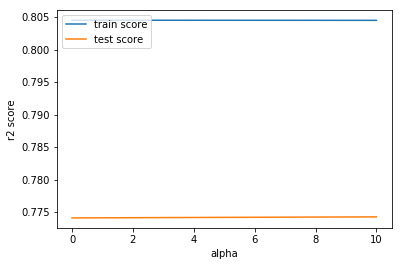

In [812]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
# plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

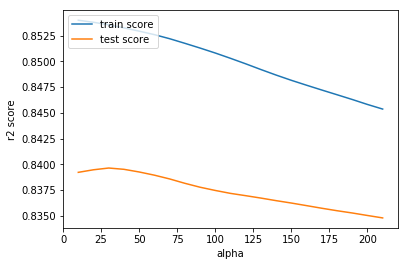

In [516]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
# plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [821]:
alpha =1200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7621902411555354
0.7211312141023605


In [822]:
lasso.coef_


array([-8675.82075224, 28372.42850521,    -0.        ,  2258.80711051,
          -0.        ,  4790.29741271,     0.        ,     0.        ,
       63088.57642104, -8131.09737421,     0.        ,    -0.        ,
       30055.4000047 , 13923.7499678 , 15664.30743757, 90330.95653886,
           0.        ,     0.        , 19575.40056673,     0.        ,
       13175.08034569,    -0.        ,    -0.        , -7555.92606188])

In [823]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [x for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 147364.62562767632),
 ('BsmtUnfSF', -8675.820752241323),
 ('TotalBsmtSF', 28372.428505213593),
 ('MSSubClass_45', -0.0),
 ('MSSubClass_70', 2258.8071105100344),
 ('MSSubClass_160', -0.0),
 ('LotConfig_CulDSac', 4790.297412705445),
 ('Condition1_Norm', 0.0),
 ('Condition1_PosF', 0.0),
 ('OverallQual_Good', 63088.57642104339),
 ('OverallCond_Bad', -8131.097374212623),
 ('OverallCond_Good', 0.0),
 ('MasVnrType_BrkCmn', -0.0),
 ('ExterQual_Good', 30055.40000470333),
 ('BsmtExposure_Gd', 13923.749967804024),
 ('FullBath_2', 15664.307437572645),
 ('FullBath_3', 90330.9565388555),
 ('HalfBath_2', 0.0),
 ('BedroomAbvGr_5', 0.0),
 ('Fireplaces_2', 19575.400566730288),
 ('GarageType_Basment', 0.0),
 ('SaleType_New', 13175.080345694667),
 ('SaleType_Others', -0.0),
 ('SaleType_WD', -0.0),
 ('Years_old', -7555.926061883688)]

In [824]:
coef_val = pd.DataFrame()
coef_val['cef_name'] = list(col)
coef_val['cef_val'] = list(lasso.coef_)
coef_val
coef_val.sort_values(by=['cef_val'], inplace = True)

In [825]:
coef_val

,cef_name,cef_val
0,BsmtUnfSF,-8675.820752
9,OverallCond_Bad,-8131.097374
23,Years_old,-7555.926062
11,MasVnrType_BrkCmn,-0.000000
4,MSSubClass_160,-0.000000
21,SaleType_Others,-0.000000
6,Condition1_Norm,0.000000
7,Condition1_PosF,0.000000
19,GarageType_Basment,0.000000
17,BedroomAbvGr_5,0.000000


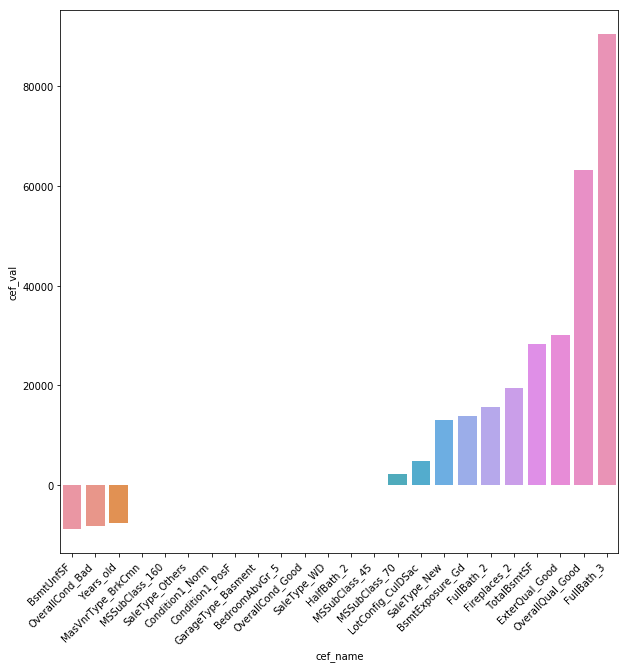

In [826]:
fig = plt.figure(figsize=(10,10))
plt.tight_layout(pad=1.4, w_pad=5.5, h_pad=1.0)
a = sns.barplot(x=coef_val['cef_name'],y=coef_val['cef_val'])
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [851]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params2, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0, 0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [852]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003399,0.000489,0.001399,0.000489,0,{'alpha': 0},0.770851,0.819072,0.762531,0.737255,0.780541,0.774091,0.026717,13,0.807112,0.793511,0.805919,0.811978,0.804012,0.804506,0.006095
1,0.002800,0.000400,0.001400,0.000490,0.01,{'alpha': 0.01},0.770802,0.819033,0.762726,0.737286,0.780594,0.774129,0.026682,12,0.807112,0.793511,0.805919,0.811978,0.804012,0.804506,0.006095
2,0.002600,0.000801,0.001001,0.000633,0.1,{'alpha': 0.1},0.770361,0.818684,0.764447,0.737564,0.781062,0.774463,0.026384,10,0.807109,0.793507,0.805911,0.811973,0.804007,0.804501,0.006095
3,0.003003,0.000634,0.001207,0.000399,0.5,{'alpha': 0.5},0.768431,0.817159,0.771388,0.738623,0.782950,0.775744,0.025377,8,0.807035,0.793429,0.805729,0.811866,0.803897,0.804391,0.006084
4,0.001999,0.000001,0.000801,0.000400,1,{'alpha': 1},0.766096,0.815310,0.778663,0.739605,0.784925,0.776947,0.024707,6,0.806828,0.793207,0.805228,0.811568,0.803587,0.804083,0.006057


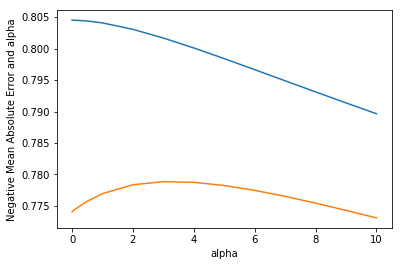

In [853]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error and alpha')
# plt.xscale('log')
plt.show()

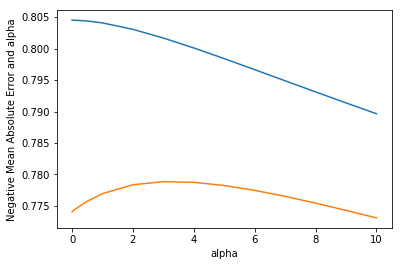

In [854]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error and alpha')
# plt.xscale('log')
plt.show()

In [858]:
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-11114.05895397,  26268.79622453,  -1223.9238696 ,  33021.41898396,
       -16103.41979218,  21333.10459915,   9410.6623082 ,  30986.79877058,
        63182.24627303, -22091.37922139,   9796.93616068, -10632.23491045,
        28257.92267983,  22320.67843162,  22060.35493217, 135175.59204162,
         3456.49372805,  13653.34579202,  29072.15475534,  -4173.73149376,
        34632.81710766,   3539.07557953,   6277.86574351,  -8447.51958912])

In [859]:
# lasso model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [x for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 124999.76556869375),
 ('BsmtUnfSF', -11114.05895397265),
 ('TotalBsmtSF', 26268.796224534664),
 ('MSSubClass_45', -1223.923869597025),
 ('MSSubClass_70', 33021.418983956944),
 ('MSSubClass_160', -16103.419792175071),
 ('LotConfig_CulDSac', 21333.104599150036),
 ('Condition1_Norm', 9410.662308200443),
 ('Condition1_PosF', 30986.79877058323),
 ('OverallQual_Good', 63182.24627302679),
 ('OverallCond_Bad', -22091.379221385105),
 ('OverallCond_Good', 9796.936160684863),
 ('MasVnrType_BrkCmn', -10632.234910451567),
 ('ExterQual_Good', 28257.922679826068),
 ('BsmtExposure_Gd', 22320.67843161701),
 ('FullBath_2', 22060.35493217178),
 ('FullBath_3', 135175.59204161688),
 ('HalfBath_2', 3456.493728046838),
 ('BedroomAbvGr_5', 13653.345792019312),
 ('Fireplaces_2', 29072.154755340875),
 ('GarageType_Basment', -4173.731493764681),
 ('SaleType_New', 34632.81710765707),
 ('SaleType_Others', 3539.075579528767),
 ('SaleType_WD', 6277.865743505717),
 ('Years_old', -8447.519589117017)]

In [860]:
ridge.fit(X_train, y_train) 
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8002888623209131
0.7211312141023605


In [841]:
coef_val1 = pd.DataFrame()
a = list(ridge.coef_)
flat = [x for sublist in a for x in sublist]
coef_val1['cef_val'] = flat
coef_val1['cef_name'] = list(X_train.columns)
coef_val1
coef_val1.sort_values(by=['cef_val'], inplace = True)
fig = plt.figure(figsize=(10,10))
plt.tight_layout(pad=1.4, w_pad=5.5, h_pad=1.0)
a = sns.barplot(x=coef_val1['cef_name'],y=coef_val1['cef_val'])
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

TypeError: 'numpy.float64' object is not iterable

In [861]:
df_1_test

,1stFlrSF,2ndFlrSF,BsmtUnfSF,EnclosedPorch,GarageArea,GrLivArea,Id,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,TotalBsmtSF,WoodDeckSF,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_TA,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,Condition1_Near_Rail,Condition1_Norm,Condition1_PosF,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_Split,OverallQual_Bad,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,ExterQual_Good,ExterCond_Good,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Good,BsmtCond_Good,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,HeatingQC_Good,Electrical_SBrkr,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Good,TotRmsAbvGrd_8_to_10,TotRmsAbvGrd_More_than_10,TotRmsAbvGrd_within_4,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Good,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Others,SaleCondition_Partial,Years_old,Since_last_modified,Since_YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,896,0,270,0,730,896,1461,11622,80.000000,0.0,0,882,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,58,58,9
1462,1329,0,406,0,312,1329,1462,14267,81.000000,108.0,36,1329,393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,61,61,9
1463,928,701,137,0,482,1629,1463,13830,74.000000,0.0,34,928,212,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,22,21,9
1464,926,678,324,0,470,1604,1464,9978,78.000000,20.0,36,926,360,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,21,21,9
1465,1280,0,1017,0,506,1280,1465,5005,43.000000,0.0,82,1280,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,27,27,9
1466,763,892,763,0,440,1655,1466,10000,75.000000,0.0,84,763,157,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,26,25,9
1467,1187,0,233,0,420,1187,1467,7980,58.713161,0.0,21,1168,483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,27,12,9
1468,789,676,789,0,393,1465,1468,8402,63.000000,0.0,75,789,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,21,21,9
1469,1341,0,663,0,506,1341,1469,10176,85.000000,0.0,0,1300,192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,29,29,9


In [862]:
df_1_test[['LotFrontage','LotArea','Years_old','Since_last_modified','MasVnrArea','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','Since_YrSold']] = scaler.transform(df_1_test[['LotFrontage','LotArea','Years_old','Since_last_modified','MasVnrArea','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','Since_YrSold']])

C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [864]:
df_1_test.drop(['BldgType_Duplex','MSSubClass_90','SaleCondition_Partial','GrLivArea','2ndFlrSF','1stFlrSF'],axis = 1, inplace = True)

C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [871]:
df_1_test = df_1_test[col]

In [872]:
# alpha =1200

# lasso = Lasso(alpha=alpha)
        
# lasso.fit(X_train, y_train) 
y_train_pred = lasso.predict(df_1_test)
# print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# y_test_pred = lasso.predict(X_test)
# print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

In [875]:
df_1_test['SalePrice'] = y_train_pred

C:\Users\shwetana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [876]:
df_1_test.head()

,BsmtUnfSF,TotalBsmtSF,MSSubClass_45,MSSubClass_70,MSSubClass_160,LotConfig_CulDSac,Condition1_Norm,Condition1_PosF,OverallQual_Good,OverallCond_Bad,OverallCond_Good,MasVnrType_BrkCmn,ExterQual_Good,BsmtExposure_Gd,FullBath_2,FullBath_3,HalfBath_2,BedroomAbvGr_5,Fireplaces_2,GarageType_Basment,SaleType_New,SaleType_Others,SaleType_WD,Years_old,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,
1461,-0.673793,-0.428617,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.331011,138548.325782
1462,-0.365338,0.664639,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.429896,166143.408161
1463,-0.975443,-0.316112,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,-0.855611,168987.765123
1464,-0.551318,-0.321004,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,-0.888573,165418.407823
1465,1.020438,0.544797,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,-0.690802,267996.638308


In [882]:
df_1_test.to_csv('House_predict_result.csv')